In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Imports and dataset

In [2]:
# imports
%cd /content/drive/My\ Drive/Thesis/
from NNClasses import *
from NNDataLoader import *
from train_util import *
import os
from copy import deepcopy
from itertools import product
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm.auto import tqdm
from time import time
from torch.utils.data import DataLoader, SubsetRandomSampler
import torch.optim as optim
from sklearn.model_selection import KFold

%load_ext autoreload
%autoreload 1
%aimport NNClasses
%aimport NNDataLoader

/content/drive/My Drive/Thesis


In [3]:
# TRAINING PARAMETERS
epochs = 500
learning_rate = 2e-4
batch_size = 10

L = 8
train_on_vortex = False 

# FIXED TRAINING PMS
cv_splits = 10
early_stop_patience = 50
Tc0 = .894 #from "Critical behavior of the two-dimensional XYmodel", Gupta & Baillie, 1992
max_data_Size = 2000 # 0 = no limit, 2000 is good because all L have >2000 samples
criterion = nn.BCELoss()
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
# Load general dataset
root = os.path.join("thesis", "data", "configs")

# load trainq and test set
train_data = load_dataSet(root, L, Tc0, max_data_Size, train_on_vortex)

Training on spin angles
Train set size: 2000 elements


# Distribution of labels

tensor([ 44, 156])
Class distribution: 22% / 78%


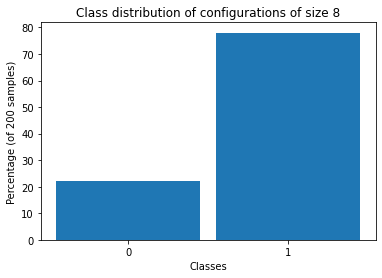

tensor([ 44, 156])
Class distribution: 22% / 78%


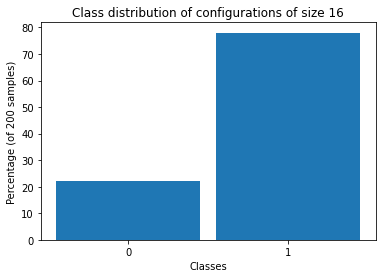

tensor([ 44, 156])
Class distribution: 22% / 78%


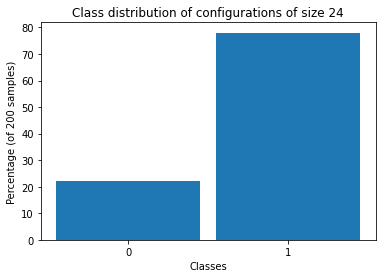

tensor([ 44, 156])
Class distribution: 22% / 78%


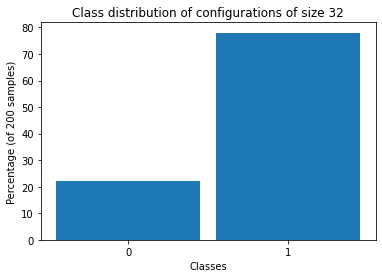

tensor([ 44, 156])
Class distribution: 22% / 78%


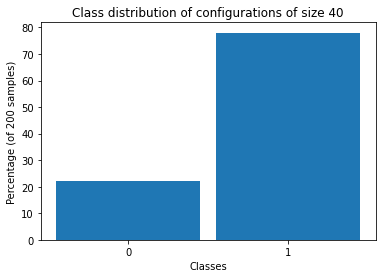

tensor([ 44, 156])
Class distribution: 22% / 78%


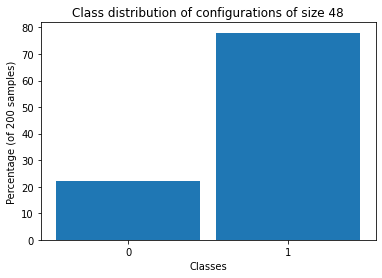

tensor([ 44, 156])
Class distribution: 22% / 78%


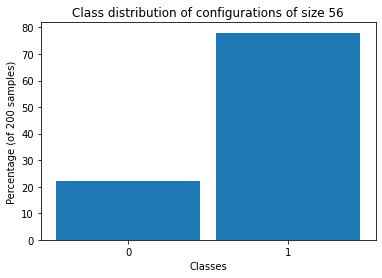

tensor([ 44, 156])
Class distribution: 22% / 78%


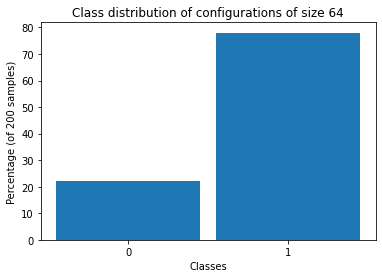

In [ ]:
if False:
  L_range = [_ for _ in range(8,64+1,8)]
  for L_ in L_range:
      classes_labels = np.array([0,1])
      classes = train_data.labels.int().squeeze().bincount().cpu()

      print(classes)
      print(f"Class distribution: {100*(classes[0]/classes.sum()):.0f}% / {100*(classes[1]/classes.sum()):.0f}%")
      width=1
      fig, ax = plt.subplots()

      ax.bar(classes_labels, classes/classes.sum()*100, width-.1, label="class distribution")
      ax.set_xticks(classes_labels)
      ax.set_ylabel(f"Percentage (of {classes.sum()} samples)")
      ax.set_xlabel("Classes")
      ax.set_title(f"Class distribution of configurations of size {L_}")
      plt.show()

# PyTorch Training loop

This training loop has it all!

* CV split in `cv_splits` splits using `KFold`.
* Early stopping after `early_stopping_patience` epochs
* Scores are saved in `all_scores` dictionary:
  * Scores per fold: `all_scores[fold_id]`
  * Scores as follows: `all_scores[fold_id] = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}`

Resetting weights of model:  CustomNN
Reset trainable parameters of layer = Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Linear(in_features=64, out_features=32, bias=True)
Reset trainable parameters of layer = Linear(in_features=32, out_features=1, bias=True)
Reset trainable parameters of layer = Conv2d(1, 4, kernel_size=(2, 2), stride=(1, 1))



Resetting weights of model:  CustomNN
Reset trainable parameters of layer = Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Linear(in_features=64, out_features=32, bias=True)
Reset trainable parameters of layer = Linear(in_features=32, out_features=1, bias=True)
Reset trainable parameters of layer = Conv2d(1, 4, kernel_size=(2, 2), stride=(1, 1))


Early stopping because no increase of validate loss after 50 epochs.
Resetting weights of model:  CustomNN
Reset trainable parameters of layer = Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Linear(in_features=64, out_features=32, bias=True)
Reset trainable parameters of layer = Linear(in_features=32, out_features=1, bias=True)
Reset trainable parameters of layer = Conv2d(1, 4, kernel_size=(2, 2), stride=(1, 1))



Resetting weights of model:  CustomNN
Reset trainable parameters of layer = Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Linear(in_features=64, out_features=32, bias=True)
Reset trainable parameters of layer = Linear(in_features=32, out_features=1, bias=True)
Reset trainable parameters of layer = Conv2d(1, 4, kernel_size=(2, 2), stride=(1, 1))


Early stopping because no increase of validate loss after 50 epochs.
Resetting weights of model:  CustomNN
Reset trainable parameters of layer = Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Linear(in_features=64, out_features=32, bias=True)
Reset trainable parameters of layer = Linear(in_features=32, out_features=1, bias=True)
Reset trainable parameters of layer = Conv2d(1, 4, kernel_size=(2, 2), stride=(1, 1))


Early stopping because no increase of validate loss after 50 epochs.
Resetting weights of model:  CustomNN
Reset trainable parameters of layer = Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Linear(in_features=64, out_features=32, bias=True)
Reset trainable parameters of layer = Linear(in_features=32, out_features=1, bias=True)
Reset trainable parameters of layer = Conv2d(1, 4, kernel_size=(2, 2), stride=(1, 1))


Early stopping because no increase of validate loss after 50 epochs.
Resetting weights of model:  CustomNN
Reset trainable parameters of layer = Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Linear(in_features=64, out_features=32, bias=True)
Reset trainable parameters of layer = Linear(in_features=32, out_features=1, bias=True)
Reset trainable parameters of layer = Conv2d(1, 4, kernel_size=(2, 2), stride=(1, 1))



Resetting weights of model:  CustomNN
Reset trainable parameters of layer = Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Linear(in_features=64, out_features=32, bias=True)
Reset trainable parameters of layer = Linear(in_features=32, out_features=1, bias=True)
Reset trainable parameters of layer = Conv2d(1, 4, kernel_size=(2, 2), stride=(1, 1))



Resetting weights of model:  CustomNN
Reset trainable parameters of layer = Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Linear(in_features=64, out_features=32, bias=True)
Reset trainable parameters of layer = Linear(in_features=32, out_features=1, bias=True)
Reset trainable parameters of layer = Conv2d(1, 4, kernel_size=(2, 2), stride=(1, 1))


Early stopping because no increase of validate loss after 50 epochs.
Resetting weights of model:  CustomNN
Reset trainable parameters of layer = Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
Reset trainable parameters of layer = Linear(in_features=64, out_features=32, bias=True)
Reset trainable parameters of layer = Linear(in_features=32, out_features=1, bias=True)
Reset trainable parameters of layer = Conv2d(1, 4, kernel_size=(2, 2), stride=(1, 1))


Early stopping because no increase of validate loss after 50 epochs.
Model CustomNN, fold 9. Best loss and accuracy: 0.3579 and 0.8700


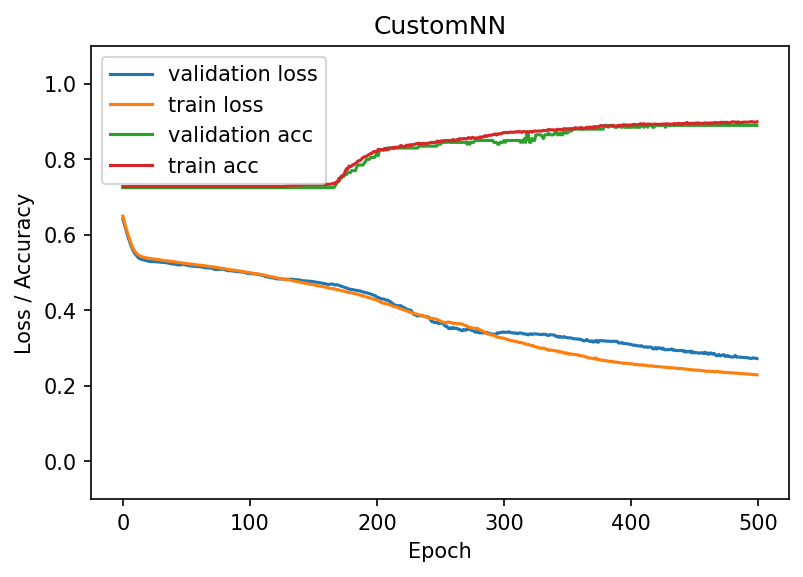

In [ ]:
from time import time
print_scores = False
save_model = False
keep_predictvslabel_inMem = False
early_stopping_enabled = True

print_EarlyStopMsg = False

#models = [FFNN(L), CNN(L)]
# ! Debugging
models = [Custom(L)]
if torch.cuda.is_available():
  for model in models:
    model.cuda()

all_scores = dict()
empty_scoring = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

for model in models:

    # K fold CV 
    Kfold = KFold(n_splits=cv_splits)

    # lists of (predictions, labels) per epoch_id per fold_id
    if keep_predictvslabel_inMem:
      outputvsprediction_data = []

    # losses and accuracies
    all_scores[model.name] = dict()
    num_samples_total = len(train_data)


    # train loop (can be function later, one loop per epoch)
    for fold_id, (train_ids, val_ids) in enumerate(Kfold.split(train_data.configs, train_data.labels)):
        if keep_predictvslabel_inMem:
          # begin of fold: add new empty list to append to
          outputvsprediction_data.append([])

        # add new score dict for this fold
        all_scores[model.name][fold_id] = deepcopy(empty_scoring)

        # define data loaders in this fold
        train_sampler = SubsetRandomSampler(train_ids)
        val_sampler = SubsetRandomSampler(val_ids)

        train_loader = DataLoader(train_data, batch_size=batch_size, sampler=train_sampler)
        val_loader = DataLoader(train_data, batch_size=batch_size, sampler=val_sampler)
        
        num_samples_fold = len(train_loader)
        num_samples_fold_val = len(val_loader)

        # reset model every fold
        model = model.apply(lambda m : reset_weights(m, silence=True))

        # init optim
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)

        if print_scores:
            print(f"Fold    Epoch    Train_loss    Validate_loss    Train_acc    Validate_acc")
        # train with this split
        for epoch_id, epoch in tqdm(enumerate(range(epochs)), desc=f"Epochs (fold {fold_id+1}/{cv_splits})"):
            epoch_loss = 0
            epoch_accuracy = 0

            if keep_predictvslabel_inMem:
                # begin of epoch: add new empty list to append to
                outputvsprediction_data[fold_id].append([])

            # loop over all batches
            for data, label in train_loader:
                num_samples_batch = len(data)
                data = data.to(device)
                label = label.to(device).float().view((num_samples_batch,1))
                
                output = model(data)
                batch_loss = criterion(output, label)

                optimizer.zero_grad() # reset accumulation of gradients
                batch_loss.backward() # grad calc for all pms who req grad
                optimizer.step() # updates pms
                
                # threshold value of 0.5 to determine class.
                batch_acc = ((output > 0.5).float() == label).float().mean()
                epoch_accuracy += batch_acc / num_samples_fold
                epoch_loss += batch_loss/ num_samples_fold
                
                if keep_predictvslabel_inMem:
                    # SAVE PREDICTION VS LABEL DATA
                    # add temp data to temp nested list
                    outputvsprediction_data[fold_id][epoch_id].append((output, label))

            # validate loop (can be different function later)
            with torch.no_grad(): # no_grad disables gradient calcs
                epoch_val_accuracy = 0
                epoch_val_loss = 0
                
                for data, label in val_loader:
                    data = data.to(device)
                    label = label.to(device).float().view((label.shape[0], 1))

                    val_output = model(data)
                    val_loss = criterion(val_output, label)
                    acc = ((val_output > 0.5).float() == label).float().mean()
                    epoch_val_accuracy += acc / num_samples_fold_val
                    epoch_val_loss += val_loss / num_samples_fold_val
            
            if print_scores:
                print(f"{fold_id+1: 5}   {epoch_id+1: 5}    {epoch_loss:.4f}        {epoch_val_loss:.4f}           {epoch_accuracy:.4f}       {epoch_val_accuracy:.4f}")    
            
            # SAVING SCORES every epoch
            all_scores[model.name][fold_id]["train_loss"].append(epoch_loss)
            all_scores[model.name][fold_id]["train_acc"].append(epoch_accuracy)
            all_scores[model.name][fold_id]["val_loss"].append(epoch_val_loss)
            all_scores[model.name][fold_id]["val_acc"].append(epoch_val_accuracy)
          
            # EARLY STOPPING
            if early_stopping_enabled:
                # check if early stopping is necessary
                if len(all_scores[model.name][fold_id]["val_loss"]) > early_stop_patience:
                  # last n losses
                  last_val_loss = all_scores[model.name][fold_id]["val_loss"][-early_stop_patience:]
                  # check if minimal loss is earliest
                  if min(last_val_loss) == last_val_loss[0]:
                    # early stopping
                    if print_EarlyStopMsg:
                      print(f"Early stopping because no increase of validate loss after {early_stop_patience} epochs.")
                    break
                    
    # SAVING MODEL after training all folds
    if save_model:
      print("Saving model: ", model.name)
      torch.save(model, os.path.join("saved_models", f"NN_{model.name}_{time()}.dat"))

    min_loss = min(all_scores[model.name][fold_id]["val_loss"])
    max_acc = max(all_scores[model.name][fold_id]["val_acc"])
    
    print(f"Model {model.name}, fold {fold_id}. Best loss and accuracy: {min_loss:.4f} and {max_acc:.4f}")
    fig, ax = plt.subplots(dpi=150)
    plot_learning_curve(ax, all_scores[model.name][0], title=model.name)

plt.show()

## Plot predictions versus labels accros a certain fold

### For all epochs

The code belows plots the prediction distribution versus the class distribution of the samples accross all trained epochs. The lighter the color, the earlier epochs the data is from.

In [ ]:
if keep_predictvslabel_inMem: # want je hebt deze data nodig: outputvsprediction_data

  %matplotlib inline
  fold_id = 0

  # lists of (outputs, labels) per epoch_id per fold_id
  # epochs = len(outputvsprediction_data[i])
  samples_count = len(outputvsprediction_data[0][0])*batch_size
  samples_count_list = range(samples_count)

  # magma colormap
  colorindex = np.linspace(0.3,.7,epochs)
  num_bins = 25

  # init figure
  fig, ax = plt.subplots(dpi=200)

  outputs, labels = [], []
  # start plotting per epoch
  for epoch_id, epochdata in enumerate(outputvsprediction_data[fold_id]):
    outputs_per_epoch, labels_per_epoch = [], []

    for outputs_, labels_ in epochdata:
      for output in outputs_:
        outputs_per_epoch.append(output.item())
      for label in labels_:
        labels_per_epoch.append(label.item())

    outputs.append(outputs_per_epoch)
    # data gets shuffled every epoch, so 
    labels.append(labels_per_epoch)

    # plt labels_per_epoch in oranges
    ax.hist(labels_per_epoch, bins=num_bins, range=(0,1), color=cm.Oranges(colorindex[epoch_id]), alpha=.5)
    
    # plt outputs_per_epoch in blues
    ax.hist(outputs_per_epoch, bins=num_bins, range=(0,1), color=cm.Blues(colorindex[epoch_id]), alpha=.8)


  plt.show()

### Single epochs

The code belows plots the distribution for single epochs separately, for a better overview. This uses the `init_fig` and `plot_hist` functions. 

The original idea of making this into a gif going over all epochs was cancelled because of bad cooperation between `.ipynb` and the `FuncAnimation` function of `matplotlib`. 

In [ ]:
if keep_predictvslabel_inMem: # want je hebt deze data nodig: outputvsprediction_data

  figs_axs = []
  for i in np.linspace(0, epochs-1, num=4 ,dtype=int):
    fig, ax = plt.subplots(dpi=200)
    figs_axs.append((fig, ax))

    init_fig(ax)
    plot_hist(ax, labels, outputs, i, num_bins)

  plt.show()

## Plot learning curve

NameError: ignored

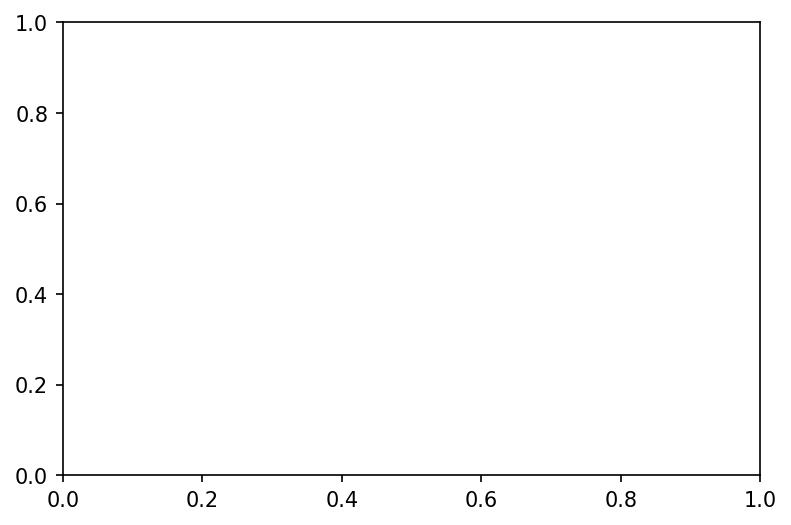

In [ ]:
fig, ax = plt.subplots(dpi=150)
plot_learning_curve(ax, all_scores[model_name][0])

# Hyperparameter tuning of a single model

Intense training of a model on ranges of pm's

Best models for every hpm are stored in `best_models` dict as:


```best_models :: [(hpm_names, hpm_values, (min_loss, max_acc), model, time)]```


Example: 
When learning learning rate and batch size:
```
>>> print(best_models)
>>> [(["lr, batch_size], [.001, 10], (0.032,0.83), #PYTORCH MODEL#, "t=XXXXXXXXX")]
```

Time is added to be able to find and load the model later.



## Parameters
Trainable parameters outside of the model are:
* `learning rate`
* `batch_size`


Other important training parameters:


* `epochs`
* `train_on_vortex` (bool)
* `L` (requires data reload)
* `early_stop_patience` 

In [5]:
if False:
  del best_models

In [6]:
hpm_names = ["lr", "batch_size"]
lr_range = [1e-0,1e-2,1e-4]
batch_size_range = [10,25] #10,25]

# testing this function
epochs = 250

hyperparameters = list(product(lr_range, batch_size_range))


models = [FFNN(L),CNN(L),Custom(L)]

# failsafe if you would be overwriting hpm tuning progress
try:
    best_models
except NameError:
    print("Not losing any progress")
else:
    raise RuntimeError("Error raised to not lose progress!")

best_models_ = [([],[], dict(), None,"") for _ in range(len(hyperparameters))]
best_models = dict()
for model in models:
  best_models[model.name] = deepcopy(best_models_)

print(f"Optimising over a total of {len(hyperparameters)} combinations of parameters.")

Not losing any progress
Optimising over a total of 6 combinations of parameters.


## Hyperparameter tuning loop

This is where the magic happens

In [7]:
empty_scoring = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}
early_stopping_enabled = True

verbose = False

models = (FFNN(L), CNN(L), Custom(L))

print("Hyperparameter Tuning")
for hpm_idx, (lr, batch_size) in tqdm(enumerate(hyperparameters), desc="Overall progress"):

    for model in models:
        if torch.cuda.is_available():
            model.cuda()

        # K fold CV 
        Kfold = KFold(n_splits=cv_splits)

        # reset scores 
        scores = {"min":[1000,.0], "max":[1000,.0], "mean":[1000,.0]}

        num_samples_total = len(train_data)
        # train loop PER FOLD
        for fold_id, (train_ids, val_ids) in tqdm(enumerate(Kfold.split(train_data.configs, train_data.labels)), desc="folds"):
            # define data loaders in this fold
            train_sampler = SubsetRandomSampler(train_ids)
            val_sampler = SubsetRandomSampler(val_ids)

            train_loader = DataLoader(train_data, batch_size=batch_size, sampler=train_sampler)
            val_loader = DataLoader(train_data, batch_size=batch_size, sampler=val_sampler)
            
            num_samples_fold = len(train_loader)
            num_samples_fold_val = len(val_loader)

            # reset model every fold
            model = model.apply(lambda m : reset_weights(m, silence=True))

            # reset scores
            # losses and accuracies
            fold_scores = [1000,0.]
            last_val_loss = np.zeros(early_stop_patience)

            # init optim
            optimizer = optim.SGD(model.parameters(), lr=learning_rate)


            # train with this fold split
            for epoch_id, epoch in enumerate(range(epochs)):
                epoch_loss = 0
                epoch_accuracy = 0

                # TRAINING
                for data, label in train_loader:
                    num_samples_batch = len(data)
                    data = data.to(device)
                    label = label.to(device).float().view((num_samples_batch,1))
                    
                    output = model(data)
                    batch_loss = criterion(output, label)

                    optimizer.zero_grad() # reset accumulation of gradients
                    batch_loss.backward() # grad calc for all pms who req grad
                    optimizer.step() # updates pms
                    
                    # threshold value of 0.5 to determine class.
                    batch_acc = ((output > 0.5).float() == label).float().mean()
                    epoch_accuracy += batch_acc / num_samples_fold
                    epoch_loss += batch_loss/ num_samples_fold


                # VALIDATING loop (can be different function later)
                with torch.no_grad(): # no_grad disables gradient calcs
                    epoch_val_acc = 0.
                    epoch_val_loss = 0.

                    for data, label in val_loader:
                        data = data.to(device)
                        label = label.to(device).float().view((label.shape[0], 1))

                        val_output = model(data)
                        val_loss = criterion(val_output, label)
                        val_acc = ((val_output > 0.5).float() == label).float().mean()
                        epoch_val_loss += val_loss / num_samples_fold_val 
                        epoch_val_acc += val_acc / num_samples_fold_val

                    # after completing all data for one epoch
                    # add val score to list for early stopping
                    last_val_loss = np.roll(last_val_loss, -1)
                    last_val_loss[-1] = epoch_val_loss.item()

                    # updating best scores if this epoch scores are better
                    if epoch_val_loss < fold_scores[0]:
                      fold_scores = [epoch_val_loss.item(), epoch_val_acc.item()]
                    
                    #print(f"scores of epoch {epoch_id+1}: {fold_scores}")
       
                # EARLY STOPPING
                if early_stopping_enabled:
                    # check if early stopping is necessary
                    if last_val_loss[0] != 0.:
                        # check if minimal loss is earliest
                        if min(last_val_loss) == last_val_loss[0]:
                            # early stopping triggered
                            if verbose:
                                print(f"Early stopping because no increase of validate loss after {early_stop_patience} epochs.")
                            break
            # after completing of all epochs for one fold
            if fold_id == 0:
              # first fold
              scores = {"min":deepcopy(fold_scores), "max":deepcopy(fold_scores), "mean":deepcopy(fold_scores)}
            else:
              # otherwise, update scores dict. [0] relates to the loss

              # update min if needed
              print("score, min, max, mean (losses): ", fold_scores[0], scores["min"][0],  scores["max"][0], scores["mean"][0])
              if fold_scores[0] < scores["min"][0]:
                scores["min"] = deepcopy(fold_scores)
              # update max if needed
              if fold_scores[0] > scores["max"][0]:
                scores["max"] = deepcopy(fold_scores)

              # update mean by adding scores of recent fold
              scores["mean"] = [a + b for a, b in zip(scores["mean"], fold_scores)]
            
            #print(f"best scores of this model {model.name} for fold {fold_id+1}: \n{scores}")
        
        # after completing all folds for one model
        # update mean of scores to divide between number of folds
        scores["mean"] = [e / cv_splits for e in scores["mean"]] # cv_splits = # of folds
        print(model.name, scores)
        if verbose:
            print(f"Model {model.name}, fold {fold_id}. Best loss and accuracy: {min_loss:.4f} and {max_acc:.4f}")

        # add as best model if empty or if model is better than the one now in
        if not best_models[model.name][hpm_idx][0]:
            best_models[model.name][hpm_idx] = (hpm_names, hyperparameters[hpm_idx], deepcopy(scores), model, "time=" + str(time()))
        if  fold_scores[0] < best_models[model.name][hpm_idx][2]["mean"][0]:
            best_models[model.name][hpm_idx] = (hpm_names, hyperparameters[hpm_idx], deepcopy(scores), model, "time=" + str(time()))
        
        #break
    # after completing all models for one hpm set
    #break
# after completing all hpm sets

Hyperparameter Tuning


score, min, max, mean (losses):  0.5713434815406799 0.5214388966560364 0.5214388966560364 0.5214388966560364
score, min, max, mean (losses):  0.5155386328697205 0.5214388966560364 0.5713434815406799 1.0927823781967163
score, min, max, mean (losses):  0.5351776480674744 0.5155386328697205 0.5713434815406799 1.6083210110664368
score, min, max, mean (losses):  0.48921650648117065 0.5155386328697205 0.5713434815406799 2.143498659133911
score, min, max, mean (losses):  0.5075915455818176 0.48921650648117065 0.5713434815406799 2.632715165615082
score, min, max, mean (losses):  0.5440653562545776 0.48921650648117065 0.5713434815406799 3.1403067111968994
score, min, max, mean (losses):  0.5483024716377258 0.48921650648117065 0.5713434815406799 3.684372067451477
score, min, max, mean (losses):  0.5928718447685242 0.48921650648117065 0.5713434815406799 4.232674539089203
score, min, max, mean (losses):  0.5219037532806396 0.48921650648117065 0.5928718447685242 4.825546383857727

FFNN {'min': [0.4

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


score, min, max, mean (losses):  0.4520777463912964 0.43799901008605957 0.43799901008605957 0.43799901008605957
score, min, max, mean (losses):  0.36056339740753174 0.43799901008605957 0.4520777463912964 0.890076756477356
score, min, max, mean (losses):  0.40791213512420654 0.36056339740753174 0.4520777463912964 1.2506401538848877
score, min, max, mean (losses):  0.34874361753463745 0.36056339740753174 0.4520777463912964 1.6585522890090942
score, min, max, mean (losses):  0.40710780024528503 0.34874361753463745 0.4520777463912964 2.0072959065437317
score, min, max, mean (losses):  0.4428837299346924 0.34874361753463745 0.4520777463912964 2.4144037067890167
score, min, max, mean (losses):  0.5283976197242737 0.34874361753463745 0.4520777463912964 2.857287436723709
score, min, max, mean (losses):  0.654763400554657 0.34874361753463745 0.5283976197242737 3.385685056447983
score, min, max, mean (losses):  0.3498033583164215 0.34874361753463745 0.654763400554657 4.04044845700264

CNN {'min'

score, min, max, mean (losses):  0.29307377338409424 0.374711811542511 0.374711811542511 0.374711811542511
score, min, max, mean (losses):  0.3423300087451935 0.29307377338409424 0.374711811542511 0.6677855849266052
score, min, max, mean (losses):  0.3373382091522217 0.29307377338409424 0.374711811542511 1.0101155936717987
score, min, max, mean (losses):  0.4033927619457245 0.29307377338409424 0.374711811542511 1.3474538028240204
score, min, max, mean (losses):  0.392929345369339 0.29307377338409424 0.4033927619457245 1.7508465647697449
score, min, max, mean (losses):  0.3030942678451538 0.29307377338409424 0.4033927619457245 2.143775910139084
score, min, max, mean (losses):  0.4443388879299164 0.29307377338409424 0.4033927619457245 2.4468701779842377
score, min, max, mean (losses):  0.5284000635147095 0.29307377338409424 0.4443388879299164 2.891209065914154
score, min, max, mean (losses):  0.4808952510356903 0.29307377338409424 0.5284000635147095 3.4196091294288635

CustomNN {'min': [

score, min, max, mean (losses):  0.6075407266616821 0.559170126914978 0.559170126914978 0.559170126914978
score, min, max, mean (losses):  0.5510621070861816 0.559170126914978 0.6075407266616821 1.1667108535766602
score, min, max, mean (losses):  0.5591174364089966 0.5510621070861816 0.6075407266616821 1.7177729606628418
score, min, max, mean (losses):  0.5170996189117432 0.5510621070861816 0.6075407266616821 2.2768903970718384
score, min, max, mean (losses):  0.5426923632621765 0.5170996189117432 0.6075407266616821 2.7939900159835815
score, min, max, mean (losses):  0.5790913105010986 0.5170996189117432 0.6075407266616821 3.336682379245758
score, min, max, mean (losses):  0.5941318273544312 0.5170996189117432 0.6075407266616821 3.9157736897468567
score, min, max, mean (losses):  0.6576941609382629 0.5170996189117432 0.6075407266616821 4.509905517101288
score, min, max, mean (losses):  0.5581940412521362 0.5170996189117432 0.6576941609382629 5.167599678039551

FFNN {'min': [0.517099618

score, min, max, mean (losses):  0.5062624216079712 0.46505406498908997 0.46505406498908997 0.46505406498908997
score, min, max, mean (losses):  0.4713359475135803 0.46505406498908997 0.5062624216079712 0.9713164865970612
score, min, max, mean (losses):  0.4519265294075012 0.46505406498908997 0.5062624216079712 1.4426524341106415
score, min, max, mean (losses):  0.3991905748844147 0.4519265294075012 0.5062624216079712 1.8945789635181427
score, min, max, mean (losses):  0.46882009506225586 0.3991905748844147 0.5062624216079712 2.2937695384025574
score, min, max, mean (losses):  0.5109162330627441 0.3991905748844147 0.5062624216079712 2.7625896334648132
score, min, max, mean (losses):  0.5427008271217346 0.3991905748844147 0.5109162330627441 3.2735058665275574
score, min, max, mean (losses):  0.6509999632835388 0.3991905748844147 0.5427008271217346 3.816206693649292
score, min, max, mean (losses):  0.46089673042297363 0.3991905748844147 0.6509999632835388 4.467206656932831

CNN {'min': [

score, min, max, mean (losses):  0.47955596446990967 0.4669486880302429 0.4669486880302429 0.4669486880302429
score, min, max, mean (losses):  0.35937315225601196 0.4669486880302429 0.47955596446990967 0.9465046525001526
score, min, max, mean (losses):  0.427330881357193 0.35937315225601196 0.47955596446990967 1.3058778047561646
score, min, max, mean (losses):  0.3362846374511719 0.35937315225601196 0.47955596446990967 1.7332086861133575
score, min, max, mean (losses):  0.3799659013748169 0.3362846374511719 0.47955596446990967 2.0694933235645294
score, min, max, mean (losses):  0.4721843898296356 0.3362846374511719 0.47955596446990967 2.4494592249393463
score, min, max, mean (losses):  0.5400607585906982 0.3362846374511719 0.47955596446990967 2.921643614768982
score, min, max, mean (losses):  0.6165398955345154 0.3362846374511719 0.5400607585906982 3.46170437335968
score, min, max, mean (losses):  0.4604681134223938 0.3362846374511719 0.6165398955345154 4.078244268894196

CustomNN {'mi

score, min, max, mean (losses):  0.5709050893783569 0.5249150395393372 0.5249150395393372 0.5249150395393372
score, min, max, mean (losses):  0.5080114603042603 0.5249150395393372 0.5709050893783569 1.095820128917694
score, min, max, mean (losses):  0.5332230925559998 0.5080114603042603 0.5709050893783569 1.6038315892219543
score, min, max, mean (losses):  0.4866418242454529 0.5080114603042603 0.5709050893783569 2.137054681777954
score, min, max, mean (losses):  0.5076225996017456 0.4866418242454529 0.5709050893783569 2.623696506023407
score, min, max, mean (losses):  0.5448072552680969 0.4866418242454529 0.5709050893783569 3.1313191056251526
score, min, max, mean (losses):  0.5460784435272217 0.4866418242454529 0.5709050893783569 3.6761263608932495
score, min, max, mean (losses):  0.591241717338562 0.4866418242454529 0.5709050893783569 4.222204804420471
score, min, max, mean (losses):  0.5207244753837585 0.4866418242454529 0.591241717338562 4.813446521759033

FFNN {'min': [0.486641824

score, min, max, mean (losses):  0.4021454155445099 0.4477817118167877 0.4477817118167877 0.4477817118167877
score, min, max, mean (losses):  0.3693479597568512 0.4021454155445099 0.4477817118167877 0.8499271273612976
score, min, max, mean (losses):  0.4222458302974701 0.3693479597568512 0.4477817118167877 1.2192750871181488
score, min, max, mean (losses):  0.3369215428829193 0.3693479597568512 0.4477817118167877 1.641520917415619
score, min, max, mean (losses):  0.3824492394924164 0.3369215428829193 0.4477817118167877 1.9784424602985382
score, min, max, mean (losses):  0.48139140009880066 0.3369215428829193 0.4477817118167877 2.3608916997909546
score, min, max, mean (losses):  0.5271601676940918 0.3369215428829193 0.48139140009880066 2.8422830998897552
score, min, max, mean (losses):  0.46078911423683167 0.3369215428829193 0.5271601676940918 3.369443267583847
score, min, max, mean (losses):  0.4128032624721527 0.3369215428829193 0.5271601676940918 3.8302323818206787

CNN {'min': [0.33

score, min, max, mean (losses):  0.3951587378978729 0.33510807156562805 0.33510807156562805 0.33510807156562805
score, min, max, mean (losses):  0.33502569794654846 0.33510807156562805 0.3951587378978729 0.730266809463501
score, min, max, mean (losses):  0.3897416889667511 0.33502569794654846 0.3951587378978729 1.0652925074100494
score, min, max, mean (losses):  0.3080157935619354 0.33502569794654846 0.3951587378978729 1.4550341963768005
score, min, max, mean (losses):  0.3823525905609131 0.3080157935619354 0.3951587378978729 1.763049989938736
score, min, max, mean (losses):  0.4605950117111206 0.3080157935619354 0.3951587378978729 2.145402580499649
score, min, max, mean (losses):  0.4608444571495056 0.3080157935619354 0.4605950117111206 2.6059975922107697
score, min, max, mean (losses):  0.5570513010025024 0.3080157935619354 0.4608444571495056 3.0668420493602753
score, min, max, mean (losses):  0.34251248836517334 0.3080157935619354 0.5570513010025024 3.6238933503627777

CustomNN {'mi

score, min, max, mean (losses):  0.6075289249420166 0.5592157244682312 0.5592157244682312 0.5592157244682312
score, min, max, mean (losses):  0.551607608795166 0.5592157244682312 0.6075289249420166 1.1667446494102478
score, min, max, mean (losses):  0.5600235462188721 0.551607608795166 0.6075289249420166 1.7183522582054138
score, min, max, mean (losses):  0.5186572074890137 0.551607608795166 0.6075289249420166 2.278375804424286
score, min, max, mean (losses):  0.5344908237457275 0.5186572074890137 0.6075289249420166 2.7970330119132996
score, min, max, mean (losses):  0.5764808058738708 0.5186572074890137 0.6075289249420166 3.331523835659027
score, min, max, mean (losses):  0.5881952047348022 0.5186572074890137 0.6075289249420166 3.908004641532898
score, min, max, mean (losses):  0.6618306040763855 0.5186572074890137 0.6075289249420166 4.4961998462677
score, min, max, mean (losses):  0.5566364526748657 0.5186572074890137 0.6618306040763855 5.158030450344086

FFNN {'min': [0.518657207489

score, min, max, mean (losses):  0.5813683271408081 0.4664381742477417 0.4664381742477417 0.4664381742477417
score, min, max, mean (losses):  0.5061522722244263 0.4664381742477417 0.5813683271408081 1.0478065013885498
score, min, max, mean (losses):  0.4453444480895996 0.4664381742477417 0.5813683271408081 1.553958773612976
score, min, max, mean (losses):  0.3803277909755707 0.4453444480895996 0.5813683271408081 1.9993032217025757
score, min, max, mean (losses):  0.47745099663734436 0.3803277909755707 0.5813683271408081 2.3796310126781464
score, min, max, mean (losses):  0.5024899244308472 0.3803277909755707 0.5813683271408081 2.8570820093154907
score, min, max, mean (losses):  0.5313922166824341 0.3803277909755707 0.5813683271408081 3.359571933746338
score, min, max, mean (losses):  0.6595340371131897 0.3803277909755707 0.5813683271408081 3.890964150428772
score, min, max, mean (losses):  0.4684784412384033 0.3803277909755707 0.6595340371131897 4.550498187541962

CNN {'min': [0.380327

score, min, max, mean (losses):  0.4802936315536499 0.40355929732322693 0.40355929732322693 0.40355929732322693
score, min, max, mean (losses):  0.430778831243515 0.40355929732322693 0.4802936315536499 0.8838529288768768
score, min, max, mean (losses):  0.46667516231536865 0.40355929732322693 0.4802936315536499 1.3146317601203918
score, min, max, mean (losses):  0.4306943416595459 0.40355929732322693 0.4802936315536499 1.7813069224357605
score, min, max, mean (losses):  0.4300234317779541 0.40355929732322693 0.4802936315536499 2.2120012640953064
score, min, max, mean (losses):  0.45243263244628906 0.40355929732322693 0.4802936315536499 2.6420246958732605
score, min, max, mean (losses):  0.4785383343696594 0.40355929732322693 0.4802936315536499 3.0944573283195496
score, min, max, mean (losses):  0.5205146670341492 0.40355929732322693 0.4802936315536499 3.572995662689209
score, min, max, mean (losses):  0.39518892765045166 0.40355929732322693 0.5205146670341492 4.093510329723358

CustomN

score, min, max, mean (losses):  0.5776375532150269 0.5197071433067322 0.5197071433067322 0.5197071433067322
score, min, max, mean (losses):  0.5079590678215027 0.5197071433067322 0.5776375532150269 1.097344696521759
score, min, max, mean (losses):  0.5349639654159546 0.5079590678215027 0.5776375532150269 1.6053037643432617
score, min, max, mean (losses):  0.48699918389320374 0.5079590678215027 0.5776375532150269 2.1402677297592163
score, min, max, mean (losses):  0.5110393166542053 0.48699918389320374 0.5776375532150269 2.62726691365242
score, min, max, mean (losses):  0.5423603653907776 0.48699918389320374 0.5776375532150269 3.1383062303066254
score, min, max, mean (losses):  0.5455185770988464 0.48699918389320374 0.5776375532150269 3.680666595697403
score, min, max, mean (losses):  0.5821206569671631 0.48699918389320374 0.5776375532150269 4.226185172796249
score, min, max, mean (losses):  0.5259323716163635 0.48699918389320374 0.5821206569671631 4.8083058297634125

FFNN {'min': [0.4

score, min, max, mean (losses):  0.4023786783218384 0.44888293743133545 0.44888293743133545 0.44888293743133545
score, min, max, mean (losses):  0.3291427791118622 0.4023786783218384 0.44888293743133545 0.8512616157531738
score, min, max, mean (losses):  0.42514491081237793 0.3291427791118622 0.44888293743133545 1.180404394865036
score, min, max, mean (losses):  0.3202378451824188 0.3291427791118622 0.44888293743133545 1.605549305677414
score, min, max, mean (losses):  0.3892382085323334 0.3202378451824188 0.44888293743133545 1.9257871508598328
score, min, max, mean (losses):  0.4673173427581787 0.3202378451824188 0.44888293743133545 2.315025359392166
score, min, max, mean (losses):  0.4744107723236084 0.3202378451824188 0.4673173427581787 2.782342702150345
score, min, max, mean (losses):  0.5155677795410156 0.3202378451824188 0.4744107723236084 3.2567534744739532
score, min, max, mean (losses):  0.35343432426452637 0.3202378451824188 0.5155677795410156 3.772321254014969

CNN {'min': [

score, min, max, mean (losses):  0.5058304667472839 0.28790518641471863 0.28790518641471863 0.28790518641471863
score, min, max, mean (losses):  0.400970458984375 0.28790518641471863 0.5058304667472839 0.7937356531620026
score, min, max, mean (losses):  0.39952394366264343 0.28790518641471863 0.5058304667472839 1.1947061121463776
score, min, max, mean (losses):  0.2800919711589813 0.28790518641471863 0.5058304667472839 1.594230055809021
score, min, max, mean (losses):  0.3518980145454407 0.2800919711589813 0.5058304667472839 1.8743220269680023
score, min, max, mean (losses):  0.2849157452583313 0.2800919711589813 0.5058304667472839 2.226220041513443
score, min, max, mean (losses):  0.4772723913192749 0.2800919711589813 0.5058304667472839 2.5111357867717743
score, min, max, mean (losses):  0.6218403577804565 0.2800919711589813 0.5058304667472839 2.988408178091049
score, min, max, mean (losses):  0.30390846729278564 0.2800919711589813 0.6218403577804565 3.6102485358715057

CustomNN {'min

score, min, max, mean (losses):  0.6133196353912354 0.5610228180885315 0.5610228180885315 0.5610228180885315
score, min, max, mean (losses):  0.5541724562644958 0.5610228180885315 0.6133196353912354 1.1743424534797668
score, min, max, mean (losses):  0.5552495718002319 0.5541724562644958 0.6133196353912354 1.7285149097442627
score, min, max, mean (losses):  0.5153569579124451 0.5541724562644958 0.6133196353912354 2.2837644815444946
score, min, max, mean (losses):  0.5406420230865479 0.5153569579124451 0.6133196353912354 2.7991214394569397
score, min, max, mean (losses):  0.580639660358429 0.5153569579124451 0.6133196353912354 3.3397634625434875
score, min, max, mean (losses):  0.5843625068664551 0.5153569579124451 0.6133196353912354 3.9204031229019165
score, min, max, mean (losses):  0.6585069298744202 0.5153569579124451 0.6133196353912354 4.504765629768372
score, min, max, mean (losses):  0.5580611824989319 0.5153569579124451 0.6585069298744202 5.163272559642792

FFNN {'min': [0.51535

score, min, max, mean (losses):  0.47205597162246704 0.46969956159591675 0.46969956159591675 0.46969956159591675
score, min, max, mean (losses):  0.41046375036239624 0.46969956159591675 0.47205597162246704 0.9417555332183838
score, min, max, mean (losses):  0.5095149874687195 0.41046375036239624 0.47205597162246704 1.35221928358078
score, min, max, mean (losses):  0.40339580178260803 0.41046375036239624 0.5095149874687195 1.8617342710494995
score, min, max, mean (losses):  0.4322280287742615 0.40339580178260803 0.5095149874687195 2.2651300728321075
score, min, max, mean (losses):  0.5170261859893799 0.40339580178260803 0.5095149874687195 2.697358101606369
score, min, max, mean (losses):  0.5283715724945068 0.40339580178260803 0.5170261859893799 3.214384287595749
score, min, max, mean (losses):  0.6461517810821533 0.40339580178260803 0.5283715724945068 3.7427558600902557
score, min, max, mean (losses):  0.4363313913345337 0.40339580178260803 0.6461517810821533 4.388907641172409

CNN {'m

score, min, max, mean (losses):  0.5466099977493286 0.44331586360931396 0.44331586360931396 0.44331586360931396
score, min, max, mean (losses):  0.4047083854675293 0.44331586360931396 0.5466099977493286 0.9899258613586426
score, min, max, mean (losses):  0.42607271671295166 0.4047083854675293 0.5466099977493286 1.3946342468261719
score, min, max, mean (losses):  0.3676491379737854 0.4047083854675293 0.5466099977493286 1.8207069635391235
score, min, max, mean (losses):  0.4877548813819885 0.3676491379737854 0.5466099977493286 2.188356101512909
score, min, max, mean (losses):  0.47809159755706787 0.3676491379737854 0.5466099977493286 2.6761109828948975
score, min, max, mean (losses):  0.48952433466911316 0.3676491379737854 0.5466099977493286 3.1542025804519653
score, min, max, mean (losses):  0.613497257232666 0.3676491379737854 0.5466099977493286 3.6437269151210785
score, min, max, mean (losses):  0.46015864610671997 0.3676491379737854 0.613497257232666 4.2572241723537445

CustomNN {'mi

## Saving the models & scores

In [8]:
import pickle

with open("best.models_lr_batchSize_L=8", "wb") as df:
  pickle.dump(best_models, df)

In [1]:
filename = "best.models_lr_batchSizes_L=8"
if False:
  # saving this progres
  import pickle 
  %cd ./saved_models/
  with open(filename, "wb") as dump_file:
    pickle.dump(best_models, dump_file)
  %cd ./../
  print("Progress saved")

[Errno 2] No such file or directory: './saved_models/'
/content


NameError: ignored

## Loading the models & scores

In [10]:
if False:
  # load models
  import pickle
  %cd ./saved_models/
  with open("", "rb") as restore_file:
    test = pickle.load(restore_file)

  %cd ./../
  print(test)

## Visualize the hyperparameter tuning
By plotting best score along different hpm

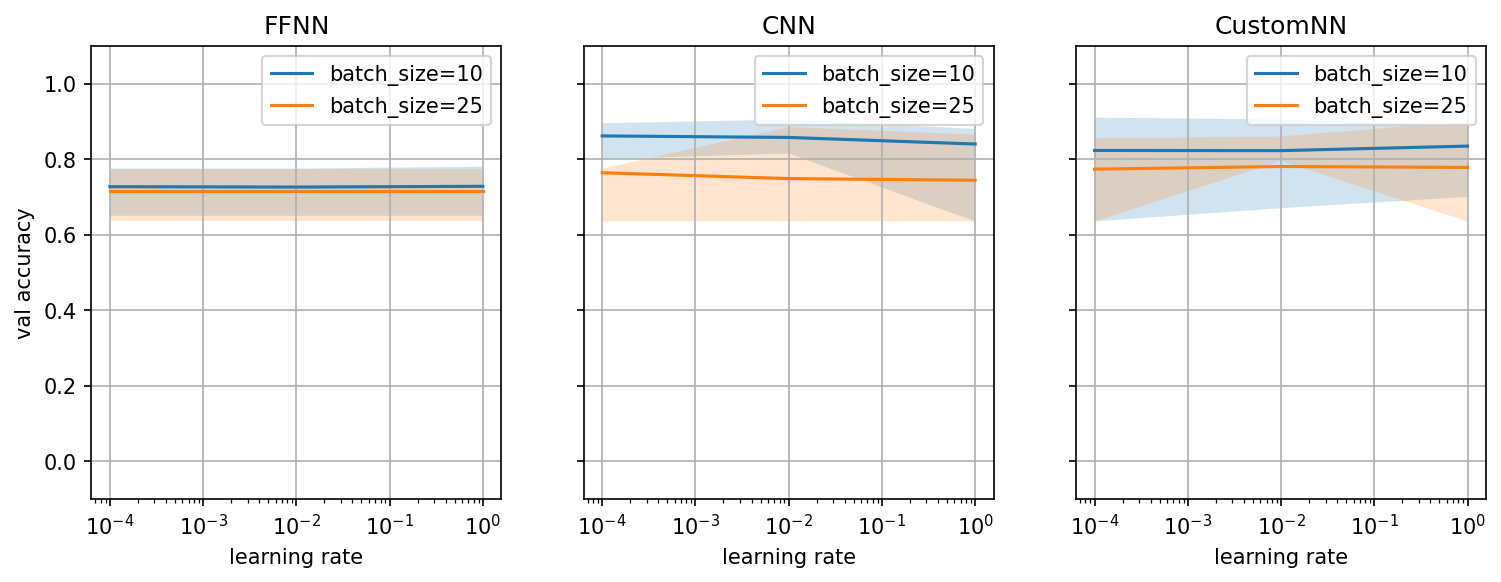

In [11]:
# for 2 hyperparameters

#hpm_names = ["lr", "batch_size"]
#lr_range = [1e-2,1e-4]
#batch_size_range = [10,25]

# score_idx = 0 -> loss will be plotted
# score_idx = 1 -> acc will be plotted
score_labels = ["val loss", "val accuracy"]
score_idx = 1

fig, axs = plt.subplots(1,3, sharey=True, dpi=150, figsize=(12,4))
axs[0].set_ylabel(score_labels[score_idx])
axs[0].set_ylim(-0.1,1.1)
for i, model in enumerate(models):
  # configure plot for the model
  axs[i].set_title(model.name)
  
  axs[i].grid()
  

  hpm_idx = 0
  # learning rate: x-axis
  axs[i].set_xlabel("learning rate" if hpm_names[hpm_idx] == "lr" else hpm_names[hpm_idx])

  hpm_idx = 1
  # batch size different colors
  for other_hpm in batch_size_range: # ! change this
    # [(hpm_names, hpm_values, (min_loss, max_acc), model, time)]
    relevant_scores = lambda type_ :  [model_score[2][type_][score_idx] for model_score in best_models[model.name] if model_score[1][hpm_idx] == other_hpm]
    axs[i].semilogx(lr_range, relevant_scores("mean"), label=f"{hpm_names[hpm_idx]}={other_hpm}")

    # plot errors as fill between 
    axs[i].fill_between(lr_range, relevant_scores("min"), relevant_scores("max"), alpha=0.2)

  axs[i].legend()

plt.show()

In [12]:
if False:
# for every hpm
  for model in models:

    for hpm_idx, hpm in enumerate(hpm_names):

      # 1D plot of score (y) in function of hpm (x):
      fig, ax = plt.subplots(dpi=150)

      ax.scatter([model_score[1][hpm_idx] for model_score in best_models[model.name]], [model_score[2][1].cpu() for model_score in best_models[model.name]] )
      ax.set_ylabel("optimal acc")
      ax.set_title(model.name)

      # best_models :: [(hpm_names, hpm_values, min_loss, model, time)]
      # lr_range = [1e-2, 1e-3,1e-4]
      # batch_size_range = [10,25,50]
  plt.show()

# Training for all system sizes! (intensive)
# **! Do this on CUDA !**
1. Load all the data sets (takes a long time).
2. Initialize the 3 models for every system size $L$
3. Train

Visualisation comes afterwards.


## Constants


In [ ]:
L_range = [8,16,24,32,40,48,56,64]
L_range= [8,24,40,64]
dataSets = []
models_per_L = []
scores_per_L = []

## Loading the data

In [ ]:
root = os.path.join("thesis", "data", "configs")

for L in L_range:
  dataSets.append(load_dataSet(root, L, Tc0, max_data_Size, train_on_vortex))

## Training the models

In [ ]:
empty_scoring = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

print_scores = False
save_model = False
#keep_predictvslabel_inMem = False
early_stopping_enabled = True

# one image
fig, ax = plt.subplots(dpi=150)

for l_idx, L in enumerate(L_range):
  models_per_L.append([FFNN(L)])
  scores_per_L.append(dict())

  for model in models:

      # K fold CV 
      Kfold = KFold(n_splits=cv_splits)

      # lists of (predictions, labels) per epoch_id per fold_id
      #if keep_predictvslabel_inMem:
      #  outputvsprediction_data = []

      # losses and accuracies
      scores_per_L[l_idx][model.name] = dict()
      num_samples_total = len(train_data)


      # train loop (can be function later, one loop per epoch)
      for fold_id, (train_ids, val_ids) in tqdm(enumerate(Kfold.split(train_data.configs, train_data.labels))):
          #if keep_predictvslabel_inMem:
          #  # begin of fold: add new empty list to append to
          #  outputvsprediction_data.append([])

          # add new score dict for this fold
          scores_per_L[l_idx][model.name][fold_id] = deepcopy(empty_scoring)

          # define data loaders in this fold
          train_sampler = SubsetRandomSampler(train_ids)
          val_sampler = SubsetRandomSampler(val_ids)

          train_loader = DataLoader(train_data, batch_size=batch_size, sampler=train_sampler)
          val_loader = DataLoader(train_data, batch_size=batch_size, sampler=val_sampler)
          
          num_samples_fold = len(train_loader)

          # reset model every fold
          model = model.apply(lambda m : reset_weights(m, True))

          # init optim
          optimizer = optim.SGD(model.parameters(), lr=learning_rate)

          if print_scores:
              print(f"Fold    Epoch    Train_loss    Validate_loss    Train_acc    Validate_acc")
          # train with this split
          for epoch_id, epoch in enumerate(range(epochs)):
              epoch_loss = 0
              epoch_accuracy = 0

              if keep_predictvslabel_inMem:
                  # begin of epoch: add new empty list to append to
                  outputvsprediction_data[fold_id].append([])

              # loop over all batches
              for data, label in train_loader:
                  num_samples_batch = len(data)
                  data = data.to(device)
                  label = label.to(device).float().view((num_samples_batch,1))
                  
                  output = model(data)
                  batch_loss = criterion(output, label)

                  optimizer.zero_grad() # reset accumulation of gradients
                  batch_loss.backward() # grad calc for all pms who req grad
                  optimizer.step() # updates pms
                  
                  # threshold value of 0.5 to determine class.
                  batch_acc = ((output > 0.5).float() == label).float().mean()
                  epoch_accuracy += batch_acc / num_samples_fold
                  epoch_loss += batch_loss/ num_samples_fold
                  
                  if keep_predictvslabel_inMem:
                      # SAVE PREDICTION VS LABEL DATA
                      # add temp data to temp nested list
                      outputvsprediction_data[fold_id][epoch_id].append((output, label))

              # validate loop (can be different function later)
              with torch.no_grad(): # no_grad disables gradient calcs
                  epoch_val_accuracy = 0
                  epoch_val_loss = 0
                  
                  for data, label in val_loader:
                      data = data.to(device)
                      label = label.to(device).float().view((label.shape[0], 1))

                      val_output = model(data)
                      val_loss = criterion(val_output, label)
                      acc = ((val_output > 0.5).float() == label).float().mean()
                      epoch_val_accuracy += acc / len(val_loader)
                      epoch_val_loss += val_loss / len(val_loader)
              
              if print_scores:
                  print(f"{fold_id+1: 5}   {epoch_id+1: 5}    {epoch_loss:.4f}        {epoch_val_loss:.4f}           {epoch_accuracy:.4f}       {epoch_val_accuracy:.4f}")    
              
              # SAVING SCORES every epoch
              scores_per_L[l_idx][model.name][fold_id]["train_loss"].append(epoch_loss)
              scores_per_L[l_idx][model.name][fold_id]["train_acc"].append(epoch_accuracy)
              scores_per_L[l_idx][model.name][fold_id]["val_loss"].append(epoch_val_loss)
              scores_per_L[l_idx][model.name][fold_id]["val_acc"].append(epoch_val_accuracy)
            
              # EARLY STOPPING
              if early_stopping_enabled:
                  # check if early stopping is necessary
                  if len(scores_per_L[l_idx][model.name][fold_id]["val_loss"]) > early_stop_patience:
                    # last n losses
                    last_val_loss = scores_per_L[l_idx][model.name][fold_id]["val_loss"][-early_stop_patience:]
                    # check if minimal loss is earliest
                    if min(last_val_loss) == last_val_loss[0]:
                      # early stopping
                      print(f"Early stopping because no increase of validate loss after {early_stop_patience} epochs.")
                      break
                      
      # SAVING MODEL after training all folds
      if save_model:
        print("Saving model: ", model_name)
        torch.save(model, os.path.join("saved_models", f"NN_{model_name}_{time()}.dat"))

      min_loss = min(scores_per_L[l_idx][model_name][fold_id]["val_loss"])
      max_acc = max(scores_per_L[l_idx][model_name][fold_id]["val_acc"])
      
      print(f"Model {model_name}, fold {fold_id}. Best loss and accuracy: {min_loss:.4f} and {max_acc:.4f}")
      
      plot_learning_curve(ax, all_scores[model_name][0])


plt.show()

## Plotting learning curves